# LABORATORIUM 5 -  Using link functions to create generalized linear models
## Bartosz Więcek




In [30]:
from cmdstanpy import CmdStanModel
import seaborn as sns

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

## Excercise 1 - Load data

In [31]:
data = pd.read_csv('Airline_data.csv')
data

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


## Excercise 2 - Create model and perform prior predictive analysis to choose priors

In [32]:
model_1 = CmdStanModel(stan_file='code_1.stan', compile=True)

R = 1000
prior = model_1.sample(data={'N_mu': 5100,
                             'N_sigma': 1100,
                             'alpha_mu': 0.00013,
                             'alpha_sigma': 0.0001,
                             'theta_mu': 0.00055,
                             'theta_sigma': 0.00008},
                       iter_sampling=R,
                       iter_warmup=0,
                       chains=1,
                       fixed_param=True,
                       seed=29042020,
                       refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [33]:
df_1 = prior.draws_pd()
df_1

,lp__,accept_stat__,N,alpha,theta,y
0,0.0,0.0,8078.99,0.000208,0.000448,35.0
1,0.0,0.0,4182.73,0.000370,0.000414,3.0
2,0.0,0.0,5917.84,0.000196,0.000568,34.0
3,0.0,0.0,4009.58,0.000311,0.000448,7.0
4,0.0,0.0,5341.60,0.000287,0.000537,12.0
...,...,...,...,...,...,...
995,0.0,0.0,3833.06,0.000034,0.000372,7.0
996,0.0,0.0,5938.92,0.000304,0.000506,24.0
997,0.0,0.0,6895.72,0.000179,0.000429,11.0
998,0.0,0.0,5070.40,0.000069,0.000489,13.0


Alpha, Theta and Y values.

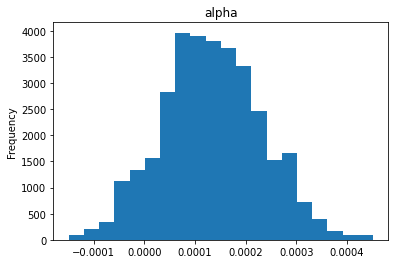

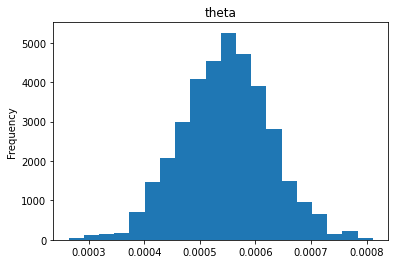

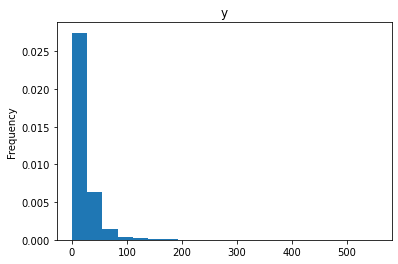

In [34]:
for signal in ['alpha', 'theta', 'y']:
    df_1[signal].plot.hist(bins=20, density=True)
    plt.title(signal)
    plt.show()

## Excercise 3 - Fit the model

Normalizing data

In [35]:
key = 'Miles flown [100 mln miles]'
data[key] = (data[key] / 1000) - (data[key] / 1000).mean()
data

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,-1.8528
1,1977,25,516,-1.4158
2,1978,31,754,-0.6888
3,1979,31,877,-0.2348
4,1980,22,814,0.0982
5,1981,21,362,0.3172
6,1982,26,764,0.1612
7,1983,20,809,0.5072
8,1984,16,223,1.7172
9,1985,22,1066,1.3912


In [36]:
posterior = model_1.sample(data={'N_mu': 0,
                                 'N_sigma': 1,
                                 'alpha_mu': 3.2,
                                 'alpha_sigma': 0.1,
                                 'theta_mu': 0.2,
                                 'theta_sigma': 0.1},
                           iter_sampling=R,
                           iter_warmup=0,
                           chains=1,
                           fixed_param=True,
                           seed=29042020,
                           refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [37]:
df_2 = posterior.draws_pd()
df_2

,lp__,accept_stat__,N,alpha,theta,y
0,0.0,0.0,2.708170,3.27772,0.072773,30.0
1,0.0,0.0,-0.833885,3.43984,0.029516,26.0
2,0.0,0.0,0.743487,3.26560,0.223010,36.0
3,0.0,0.0,-0.991294,3.38121,0.071969,29.0
4,0.0,0.0,0.219635,3.35748,0.183823,33.0
...,...,...,...,...,...,...
995,0.0,0.0,-2.386850,3.21039,0.221942,16.0
996,0.0,0.0,-0.685624,3.34868,0.235204,17.0
997,0.0,0.0,-1.119040,3.22172,0.159248,20.0
998,0.0,0.0,1.028340,3.28759,0.228523,36.0


Alpha, Theta and Y values.

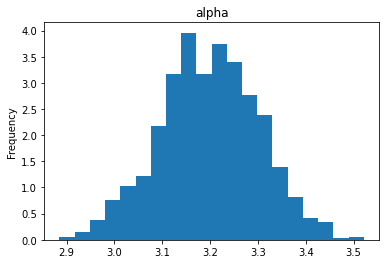

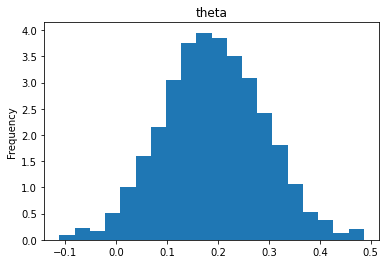

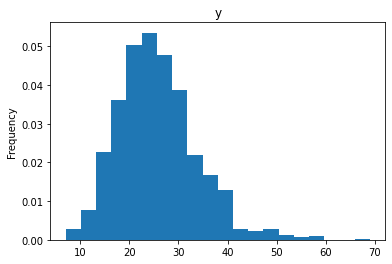

In [38]:
for signal in ['alpha', 'theta', 'y']:
    df_2[signal].plot.hist(bins=20, density=True)
    plt.title(signal)
    plt.show()

Fitting

In [39]:
model_2 = CmdStanModel(stan_file='code_2.stan')
fit = model_2.sample(data={'N': data.shape[0], 
                           'miles': data[key].values, 
                           'fatal_accidents': data["Fatal accidents"].values})


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [40]:
df_3 = fit.draws_pd()
df_3

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,accidents_sample[1],accidents_sample[2],accidents_sample[3],accidents_sample[4],accidents_sample[5],accidents_sample[6],accidents_sample[7],accidents_sample[8],accidents_sample[9],accidents_sample[10]
0,514.403,1.000000,0.865554,2.0,3.0,0.0,-514.330,3.18821,-0.014490,16.0,18.0,32.0,27.0,25.0,29.0,19.0,25.0,23.0,23.0
1,514.336,0.988799,0.865554,2.0,3.0,0.0,-514.303,3.18396,0.001621,29.0,30.0,23.0,23.0,23.0,24.0,27.0,27.0,19.0,17.0
2,514.158,0.981414,0.865554,2.0,3.0,0.0,-514.103,3.14129,-0.033657,26.0,25.0,26.0,15.0,25.0,29.0,21.0,21.0,18.0,23.0
3,513.122,0.871618,0.865554,2.0,3.0,0.0,-512.710,3.09281,0.000473,20.0,19.0,23.0,20.0,13.0,19.0,19.0,19.0,25.0,25.0
4,511.900,0.932213,0.865554,2.0,3.0,0.0,-511.516,3.08646,0.059338,23.0,16.0,10.0,18.0,16.0,22.0,12.0,38.0,34.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,513.558,1.000000,0.797243,2.0,3.0,0.0,-510.046,3.18572,0.048398,18.0,24.0,19.0,19.0,23.0,22.0,16.0,30.0,25.0,21.0
3996,514.103,0.868196,0.797243,2.0,3.0,0.0,-511.857,3.14254,0.003854,22.0,23.0,22.0,19.0,24.0,18.0,22.0,20.0,17.0,25.0
3997,513.879,0.986803,0.797243,2.0,3.0,0.0,-513.735,3.12166,-0.016357,27.0,21.0,24.0,25.0,25.0,22.0,19.0,20.0,14.0,23.0
3998,514.076,0.979798,0.797243,2.0,3.0,0.0,-513.540,3.13728,-0.038712,27.0,16.0,23.0,17.0,19.0,20.0,23.0,21.0,24.0,13.0


## Excercise 4 - Compare histograms of accidents for entire period and for each year.

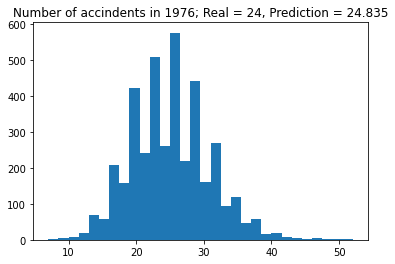

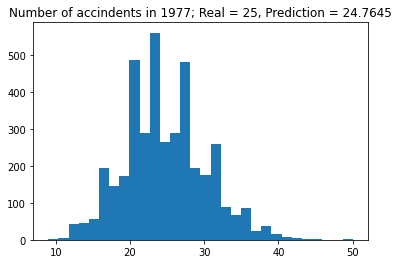

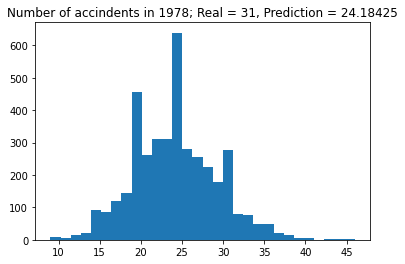

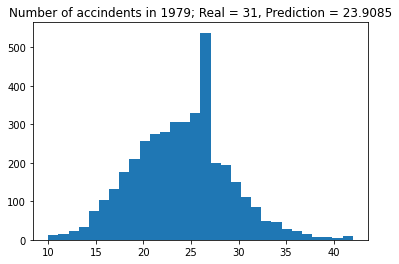

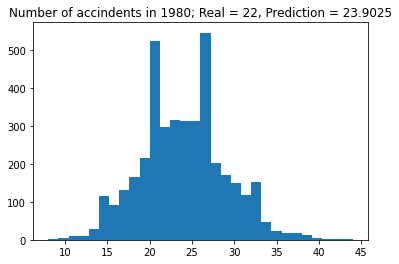

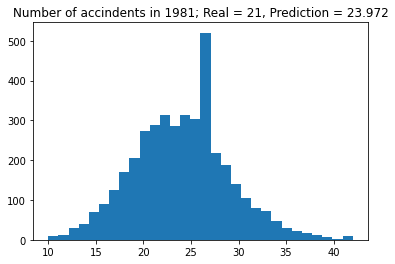

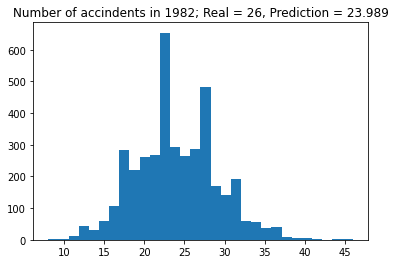

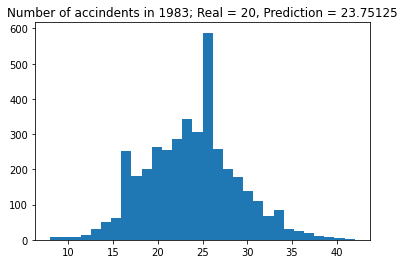

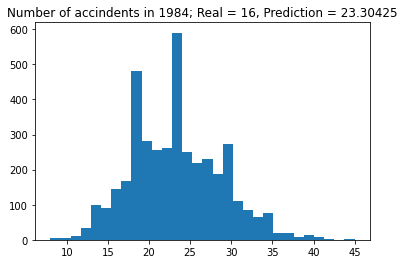

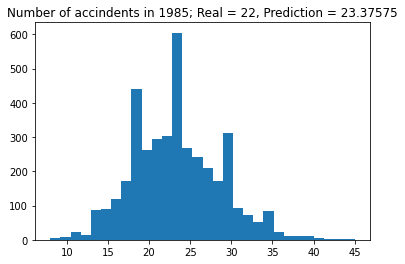

In [41]:
year = 1976
for i in range(1,11):
    plt.hist(df_3[f'accidents_sample[{i}]'], bins = 30)
    plt.title(f"Number of accindents in {year}; Real = {data['Fatal accidents'][i-1]}, Prediction = {df_3[f'accidents_sample[{i}]'].mean()}")
    plt.show()
    year += 1

## Excercise 5 - Improve model and compare histograms of accidents for entire period and for each year.

In [42]:
model_3 = CmdStanModel(stan_file='code_3.stan')
improved = model_2.sample(data={'N': data.shape[0], 
                                'miles': data[key].values, 
                                'fatal_accidents': data["Fatal accidents"].values})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [43]:
df_4 = improved.draws_pd()
df_4

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,theta,accidents_sample[1],accidents_sample[2],accidents_sample[3],accidents_sample[4],accidents_sample[5],accidents_sample[6],accidents_sample[7],accidents_sample[8],accidents_sample[9],accidents_sample[10]
0,514.008,1.000000,1.071870,2.0,3.0,0.0,-513.663,3.19678,0.024405,23.0,27.0,17.0,28.0,24.0,25.0,21.0,24.0,29.0,26.0
1,513.530,0.922106,1.071870,2.0,3.0,0.0,-513.399,3.18974,-0.087590,22.0,18.0,28.0,18.0,23.0,27.0,25.0,17.0,17.0,30.0
2,513.578,0.864311,1.071870,2.0,3.0,0.0,-512.125,3.16616,0.047117,24.0,19.0,29.0,30.0,18.0,30.0,20.0,19.0,28.0,27.0
3,514.284,1.000000,1.071870,2.0,3.0,0.0,-513.734,3.18976,-0.044526,23.0,26.0,20.0,23.0,24.0,23.0,25.0,25.0,20.0,22.0
4,514.311,0.857422,1.071870,2.0,3.0,0.0,-513.325,3.16758,0.002703,35.0,30.0,18.0,31.0,18.0,32.0,16.0,19.0,29.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,511.347,0.777734,0.837905,1.0,1.0,0.0,-511.340,3.04749,-0.059670,20.0,18.0,28.0,18.0,18.0,18.0,20.0,16.0,15.0,25.0
3996,512.415,1.000000,0.837905,2.0,3.0,0.0,-510.914,3.26522,0.041318,16.0,29.0,26.0,21.0,26.0,30.0,28.0,32.0,16.0,34.0
3997,512.007,0.949630,0.837905,3.0,7.0,0.0,-510.378,3.21000,-0.127567,24.0,21.0,29.0,23.0,29.0,18.0,33.0,27.0,19.0,13.0
3998,510.252,0.880118,0.837905,2.0,3.0,0.0,-509.848,3.10406,0.115493,27.0,21.0,22.0,14.0,24.0,22.0,17.0,24.0,21.0,34.0


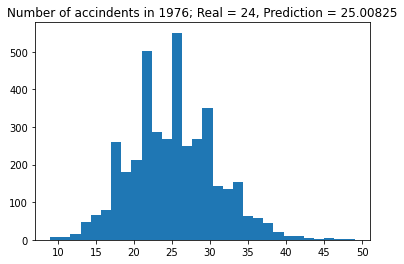

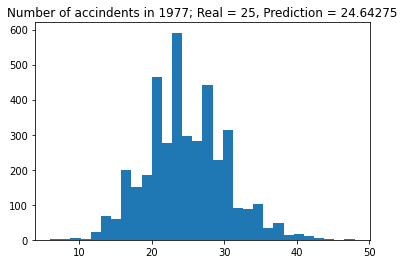

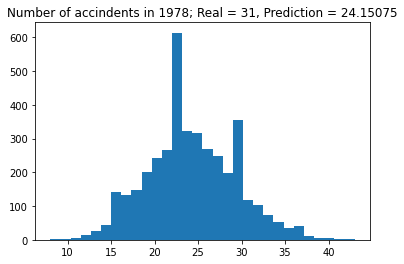

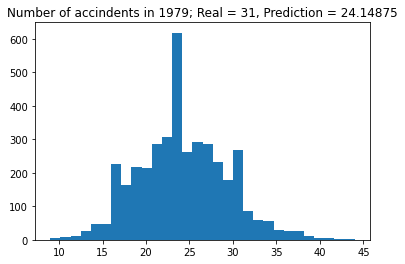

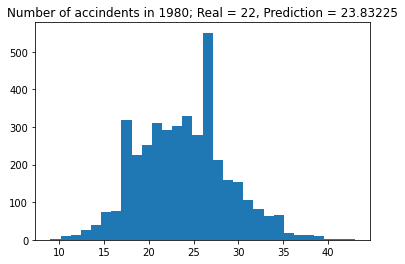

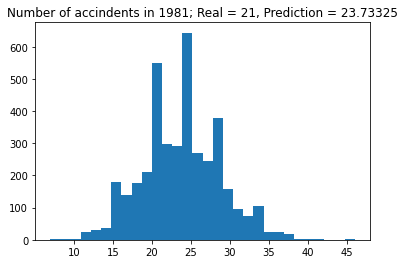

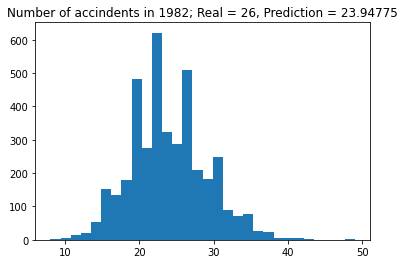

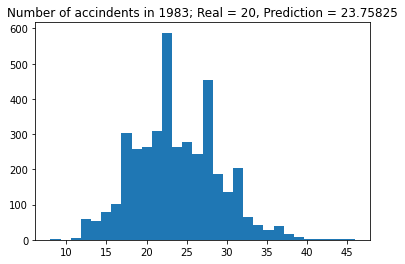

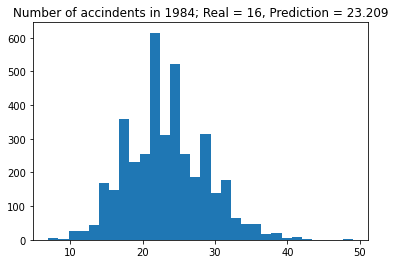

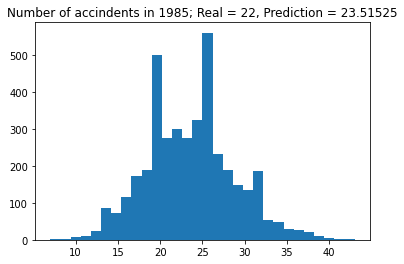

In [44]:
year = 1976
for i in range(1,11):
    plt.hist(df_4[f'accidents_sample[{i}]'], bins = 30)
    plt.title(f"Number of accindents in {year}; Real = {data['Fatal accidents'][i-1]}, Prediction = {df_4[f'accidents_sample[{i}]'].mean()}")
    plt.show()
    year += 1

Predictions are slightly better after improvement.